In [1]:
import numpy as np
import os
import dill as pickle
import matplotlib.pyplot as plt
import pandas as pd
import sys
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.spectroscopy as spec
import analysis.plotting as plotting

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
readout = Readout(readout_dict)
print(f"{q1}\n{q2}")
bnc.set_bnc_output(
    readout.RO_LO, power_dBm=readout.RO_LO_pwr, bnc_addr=bnc_address["target_bnc_black"]
)
bnc.set_bnc_output(
    general_vals_dict["TWPA_freq"],
    power_dBm=general_vals_dict["TWPA_amp"],
    bnc_addr=bnc_address["TWPA_address"],
)
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=bnc_address["target_bnc_6"]
)

Qubit(RO_LO_pwr=16, ef_half_amp=1.3, mixer_offset_ge=2.5, ge_amp=1, ge_ssm=-0.117, ef_half_time=25, ro_dur=5000, RO_LO_45=6.3804, ro_freq=6.72736, ef_amp=1.5, ef_ssm=-0.25684, ef_time=44, qubit_thr=[-10000, -600], RO_LO=6.6247, RO_IF=None, IQ_angle=60, ROIF=0.1026600000000002, RO_LO_34=6.4804, qubit_id=q1, ro_amp=0.5, ge_time=77, mixer_offset_ef=6)
Qubit(RO_LO_pwr=16, ef_half_amp=None, mixer_offset_ge=2.5, ge_amp=1, ge_ssm=-0.155, ef_half_time=None, ro_dur=5000, RO_LO_45=6.3804, ro_freq=6.6554, ef_amp=1, ef_ssm=-0.2962, ef_time=None, qubit_thr=[-10000, 1900], RO_LO=6.6247, RO_IF=None, IQ_angle=25, ROIF=0.030700000000000394, RO_LO_34=6.4804, qubit_id=q2, ro_amp=0.6, ge_time=62, mixer_offset_ef=None)


In [3]:
def spectroscopy(q1,
                 q2,
                 general_vals_dict,
                 f1:float,
                 f2:float,
                 spec_amp:float,
                 num_steps:int,
                 sweep_time:float,
                 reps:int
                 ):
    spec.spectroscopy_ge(
        q1,
        q2,
        general_vals_dict,
        ssm_start=f1,
        ssm_stop=f2,
        spec_amp=spec_amp,
        sweep_time=sweep_time,
        verbose=False,
    )
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # Acquire the raw IQ data
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=False
    )
    return values

def spectroscopy_ef(q1,
                    q2,
                    general_vals_dict,
                    f1:float,
                    f2:float,
                    spec_amp:float,
                    num_steps:int,
                    sweep_time:float,
                    reps:int
                    ):
    spec.spectroscopy_ef(
        q1,
        q2,
        general_vals_dict,
        ssm_start=f1,
        ssm_stop=f2,
        spec_amp=spec_amp,
        sweep_time=sweep_time,
        verbose=False,
    )
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # Acquire the raw IQ data
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=False
    )
    return values

In [12]:
f1=-0.2
f2=-0.3
num_steps=101
reps=500
spec_amp=0.04
sweep_time=8000
freq_list = np.linspace(f1, f2, num_steps)
values=spectroscopy_ef(q1,q2,general_vals_dict,f1,f2,spec_amp,num_steps,sweep_time,reps)
dat = plotting.get_IQ_averages(values)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 101
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 101
Records per pattern: 500
Buffers per acquistion: 17
DAQ samples per pattern: 8192
0, No error
Capturing 17 buffers. Press <enter> to abort
Capture completed in 11.162710 sec
Captured 17 buffers (1.522928 buffers per sec)
Captured 52224 records (4678.433742 records per sec)
Transferred 855638016 bytes (76651458.422737 bytes per sec)


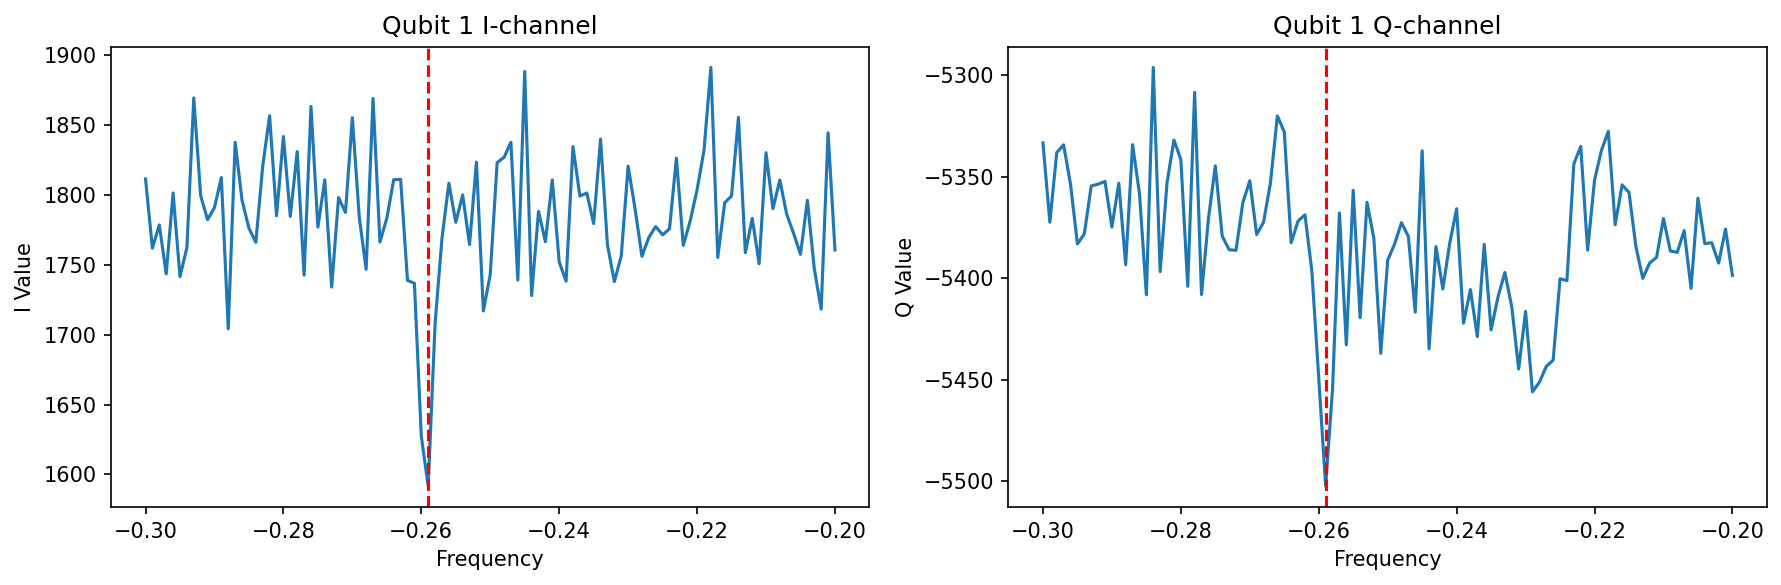

-0.259

In [13]:
freq_list = np.linspace(f1, f2, num_steps)
dat = plotting.get_IQ_averages(values)
freq = freq_list[np.argmin(dat["I1"])]
plotting.spectroscopy_plot(freq_list, values, [freq, freq], qubit_num=1)
freq